<a href="https://colab.research.google.com/github/bwoody13/CNN-MNIST_CIFAR10-Classification/blob/main/train_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize Notebook
Make sure to select GPU runtime if you want to train on GPU

## Clone and Pull Git Repository (Only if using in Colab - recommended for training and to use GPU)

In [ ]:
!git clone https://github.com/bwoody13/CNN-MNIST_CIFAR10-Classification.git
%cd CNN-MNIST_CIFAR10-Classification

Cloning into 'CNN-MNIST_CIFAR10-Classification'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 172 (delta 87), reused 125 (delta 50), pack-reused 0
Receiving objects: 100% (172/172), 38.30 MiB | 34.25 MiB/s, done.
Resolving deltas: 100% (87/87), done.
/content/CNN-MNIST_CIFAR10-Classification


Pull anytime repo udpated and want to have new code here

In [ ]:
!git pull origin mnist-bigger

remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 12 (delta 7), reused 12 (delta 7), pack-reused 0
Unpacking objects: 100% (12/12), 2.38 MiB | 7.33 MiB/s, done.
From https://github.com/bwoody13/CNN-MNIST_CIFAR10-Classification
 * branch            mnist-bigger -> FETCH_HEAD
 * [new branch]      mnist-bigger -> origin/mnist-bigger
Updating a8f4b95..415b21d
Fast-forward
 CIFAR10/models/cifar10_res_net_v2.pth | Bin 0 -> 2761730 bytes
 MNIST/mnist_cnn.py                    |  19 +++++++++++--------
 index.py                              |   7 +++++--
 3 files changed, 16 insertions(+), 10 deletions(-)
 create mode 100644 CIFAR10/models/cifar10_res_net_v2.pth


In [ ]:
!pwd

/content/CNN-MNIST_CIFAR10-Classification


## Import Necessary Libraries

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# External
import torch
from torchvision.datasets import MNIST, CIFAR10
from torchvision import transforms
from torchvision.transforms import ToTensor, Normalize
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import numpy as np
import matplotlib.pyplot as plt

# Internal
from MNIST.mnist_cnn import MNISTCNN
from CIFAR10.cifar10_cnn import CIFAR10CNN
from CIFAR10.cifar10_resnet import CIFAR10ResNet
# from base_cnn import BaseCNN
from train_test import train, test
from save_load import save_model, MNIST_type, CIFAR10_type

# MNIST Training

## Load and Prep Datasets for Training

In [ ]:
data_mean = 0.1307
data_std = 0.3081
init_trans = transforms.Compose([
    ToTensor(),
    Normalize((data_mean,), (data_std,))
])
dataset = MNIST(root='data/', train=True, download=True, transform=init_trans)
test_ds = MNIST(root='data/', train=False, download=True, transform=init_trans)
val_size = int(0.1 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

100%|██████████| 9912422/9912422 [00:00<00:00, 117877396.12it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 121135693.82it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30749184.78it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1660466.20it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Visualize Data

torch.Size([16, 1, 28, 28])


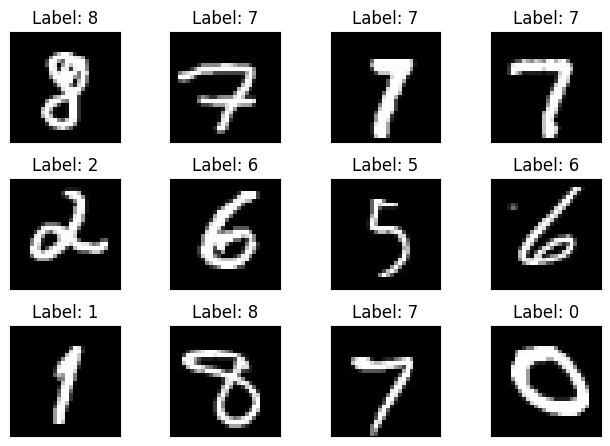

In [ ]:
examples = enumerate(DataLoader(dataset, 16, shuffle=True))
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)
fig = plt.figure()
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Label: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

## Initialize CNN Model

In [ ]:
print(torch.cuda.is_available())
model = MNISTCNN(learning_rate=0.01, weight_decay=1e-4, epochs=50, batch_size=128, gamma=0.2, step=15)
print(model.device)

True
cuda:0


## Create DataLoaders according to model

In [ ]:
num_workers = 2 if 'cuda' in model.device.type else 0
pin_memory = True if 'cuda' in model.device.type else False

train_loader = DataLoader(train_dataset, model.batch_size, shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
val_loader = DataLoader(val_dataset, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)
test_loader = DataLoader(test_ds, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)

## Train the Model

Epoch 1, Batch 100, Loss: 3.4988
Epoch 1, Batch 200, Loss: 1.9253
Epoch 1, Batch 300, Loss: 1.7816
Epoch 1, Batch 400, Loss: 1.7166
Validation Loss: 1.0098, Validation Accuracy: 69.50%
Epoch 2, Batch 100, Loss: 1.5269
Epoch 2, Batch 200, Loss: 1.4399
Epoch 2, Batch 300, Loss: 1.2991
Epoch 2, Batch 400, Loss: 1.1963
Validation Loss: 0.3080, Validation Accuracy: 92.28%
Epoch 3, Batch 100, Loss: 1.0954
Epoch 3, Batch 200, Loss: 0.9416
Epoch 3, Batch 300, Loss: 0.8225
Epoch 3, Batch 400, Loss: 0.6899
Validation Loss: 0.1344, Validation Accuracy: 96.50%
Epoch 4, Batch 100, Loss: 0.5529
Epoch 4, Batch 200, Loss: 0.4921
Epoch 4, Batch 300, Loss: 0.4631
Epoch 4, Batch 400, Loss: 0.4135
Validation Loss: 0.1131, Validation Accuracy: 97.02%
Epoch 5, Batch 100, Loss: 0.3802
Epoch 5, Batch 200, Loss: 0.3348
Epoch 5, Batch 300, Loss: 0.3631
Epoch 5, Batch 400, Loss: 0.3659
Validation Loss: 0.0800, Validation Accuracy: 97.73%
Epoch 6, Batch 100, Loss: 0.3205
Epoch 6, Batch 200, Loss: 0.3154
Epoch 6, 

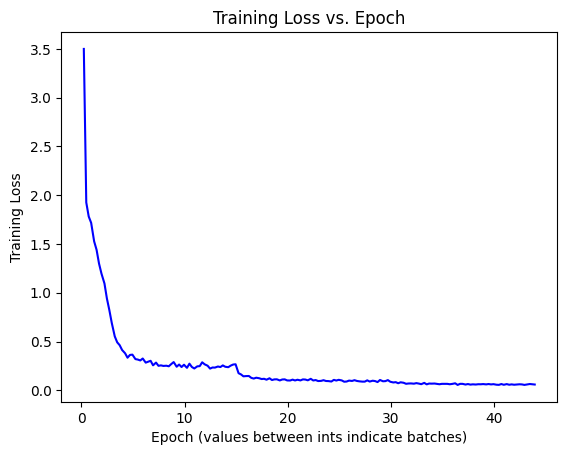

In [ ]:
train(model, train_loader, val_loader, use_scheduler=True, patience=6)

## Test Model

In [ ]:
# Train Dataset
test(model, train_loader)

Accuracy for class: 0     is 5335/5344 (99.83%)
Accuracy for class: 1     is 6067/6084 (99.72%)
Accuracy for class: 2     is 5367/5385 (99.67%)
Accuracy for class: 3     is 5484/5528 (99.20%)
Accuracy for class: 4     is 5220/5247 (99.49%)
Accuracy for class: 5     is 4851/4875 (99.51%)
Accuracy for class: 6     is 5288/5298 (99.81%)
Accuracy for class: 7     is 5592/5613 (99.63%)
Accuracy for class: 8     is 5191/5259 (98.71%)
Accuracy for class: 9     is 5335/5367 (99.40%)

Test set: Average loss: 0.0161, Accuracy: 53730/54000 (99.50%)


In [ ]:
# Test Dataset
test(model, test_loader)

Accuracy for class: 0     is 979/980 (99.90%)
Accuracy for class: 1     is 1131/1135 (99.65%)
Accuracy for class: 2     is 1030/1032 (99.81%)
Accuracy for class: 3     is 1006/1010 (99.60%)
Accuracy for class: 4     is 973/982 (99.08%)
Accuracy for class: 5     is 887/892 (99.44%)
Accuracy for class: 6     is 953/958 (99.48%)
Accuracy for class: 7     is 1024/1028 (99.61%)
Accuracy for class: 8     is 967/974 (99.28%)
Accuracy for class: 9     is 1002/1009 (99.31%)

Test set: Average loss: 0.0145, Accuracy: 9952/10000 (99.52%)


## Save Model (Need to move to repo manually)

In [ ]:
save_state_dict(model, "99_52-Test", MNIST_type)

# CIFAR10 Training

## Load and Prep Datasets for Training

In [ ]:
init_trans = transforms.Compose([
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = CIFAR10(root='data/', train=True, download=True, transform=init_trans)
test_ds = CIFAR10(root='data/', train=False, download=True, transform=init_trans)
val_size = int(0.1 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

100%|██████████| 170498071/170498071 [00:03<00:00, 49875728.66it/s]


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


## Visualize Data

torch.Size([16, 3, 32, 32])


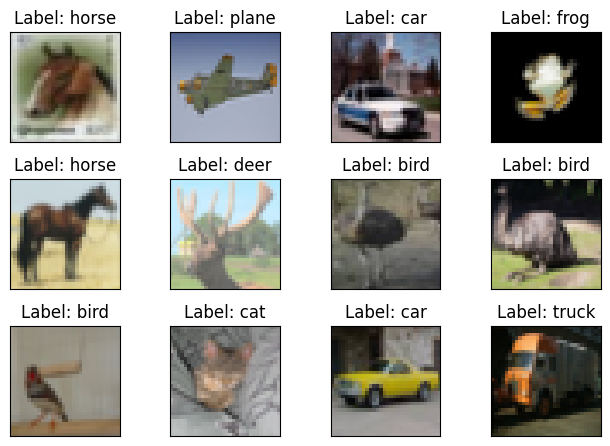

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
examples = enumerate(DataLoader(dataset, 16, shuffle=True))
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)
fig = plt.figure()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.tight_layout()
    # Unnoramlize image and transpose (inputs are channel, height, width)
    image = example_data[i] * 0.5 + 0.5
    image = np.transpose(image, (1, 2, 0))
    plt.imshow(image)
    plt.title(f"Label: {classes[example_targets[i]]}")
    plt.xticks([])
    plt.yticks([])

plt.show()

## Initialize CNN Model

In [ ]:
print(torch.cuda.is_available())
# model = CIFAR10CNN(momentum=0.9, learning_rate=0.1, weight_decay=1e-4, batch_size=128)
model = CIFAR10ResNet([7, 7, 7], learning_rate=0.1, weight_decay=0.0001, batch_size=128, momentum=0.9)
print(model.device)

True
cuda:0


## Create DataLoaders according to model

In [ ]:
num_workers = 2 if 'cuda' in model.device.type else 0
pin_memory = True if 'cuda' in model.device.type else False

train_loader = DataLoader(train_dataset, model.batch_size, shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
val_loader = DataLoader(val_dataset, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)
test_loader = DataLoader(test_ds, model.batch_size, num_workers=num_workers, pin_memory=pin_memory)

## Train the Model

Epoch 1, Batch 100, Loss: 2.7388
Epoch 1, Batch 200, Loss: 2.2337
Epoch 1, Batch 300, Loss: 1.8749
Validation Loss: -2.8562, Validation Accuracy: 41.90%
Epoch 2, Batch 100, Loss: 1.6095
Epoch 2, Batch 200, Loss: 1.5213
Epoch 2, Batch 300, Loss: 1.4166
Validation Loss: -2.9140, Validation Accuracy: 43.96%
Epoch 3, Batch 100, Loss: 1.3121
Epoch 3, Batch 200, Loss: 1.2345
Epoch 3, Batch 300, Loss: 1.1479
Validation Loss: -4.4374, Validation Accuracy: 60.10%
Epoch 4, Batch 100, Loss: 1.0609
Epoch 4, Batch 200, Loss: 1.0238
Epoch 4, Batch 300, Loss: 0.9948
Validation Loss: -4.9784, Validation Accuracy: 62.34%
Epoch 5, Batch 100, Loss: 0.9228
Epoch 5, Batch 200, Loss: 0.9105
Epoch 5, Batch 300, Loss: 0.8626
Validation Loss: -5.6754, Validation Accuracy: 70.60%
Epoch 6, Batch 100, Loss: 0.8099
Epoch 6, Batch 200, Loss: 0.8078
Epoch 6, Batch 300, Loss: 0.7776
Validation Loss: -6.0490, Validation Accuracy: 73.20%
Epoch 7, Batch 100, Loss: 0.7256
Epoch 7, Batch 200, Loss: 0.7095
Epoch 7, Batch 3

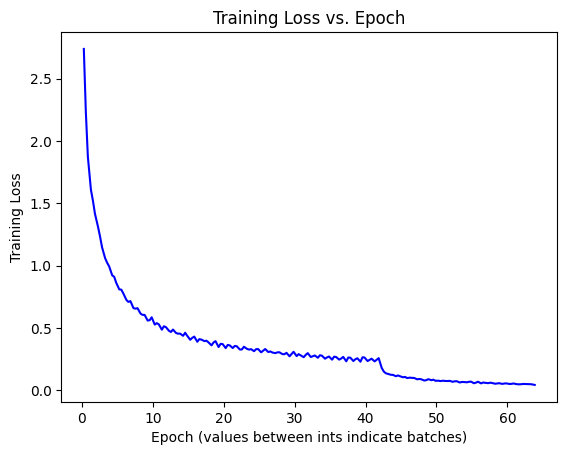

In [ ]:
train(model, train_loader, val_loader, use_scheduler=True, patience=10)

## Test Model

In [ ]:
# Train Dataset
test(model, train_loader)

Accuracy for class: plane is 4479/4497 (99.60%)
Accuracy for class: car   is 4494/4512 (99.60%)
Accuracy for class: bird  is 4494/4535 (99.10%)
Accuracy for class: cat   is 4399/4507 (97.60%)
Accuracy for class: deer  is 4465/4489 (99.47%)
Accuracy for class: dog   is 4386/4497 (97.53%)
Accuracy for class: frog  is 4478/4490 (99.73%)
Accuracy for class: horse is 4471/4486 (99.67%)
Accuracy for class: ship  is 4438/4452 (99.69%)
Accuracy for class: truck is 4513/4535 (99.51%)

Test set: Average loss: -16.8189, Accuracy: 44617/45000 (99.15%)


In [ ]:
# Test Dataset
test(model, test_loader)

Accuracy for class: plane is 920/1000 (92.00%)
Accuracy for class: car   is 949/1000 (94.90%)
Accuracy for class: bird  is 897/1000 (89.70%)
Accuracy for class: cat   is 789/1000 (78.90%)
Accuracy for class: deer  is 919/1000 (91.90%)
Accuracy for class: dog   is 830/1000 (83.00%)
Accuracy for class: frog  is 946/1000 (94.60%)
Accuracy for class: horse is 932/1000 (93.20%)
Accuracy for class: ship  is 939/1000 (93.90%)
Accuracy for class: truck is 936/1000 (93.60%)

Test set: Average loss: -15.7886, Accuracy: 9057/10000 (90.57%)


## Save Model (Need to move to repo manually)

In [ ]:
save_model(model, "cifar10_res_net_v2", CIFAR10_type)